In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from mylib.visualize import qqplot
from BiasCorrectionLib.BiasCorrection import *
from BiasCorrectionLib.Error import *

In [3]:
path = "./results/"
files = os.listdir(path)
files

['TH000048327_PRCP.csv',
 'TH000048327_TAVG.csv',
 'TH000048327_TMAX.csv',
 'TH000048327_TMIN.csv']

In [9]:
df = pd.read_csv(f"{path}/{files[1]}")

obs_index = df.columns[2]
mod_index = df.columns[1]

methods = list(df.columns[3:])
methods

['PTF', 'RQUANT', 'QUANT', 'SSPLIN', 'shift', 'scale', 'linear_reg']

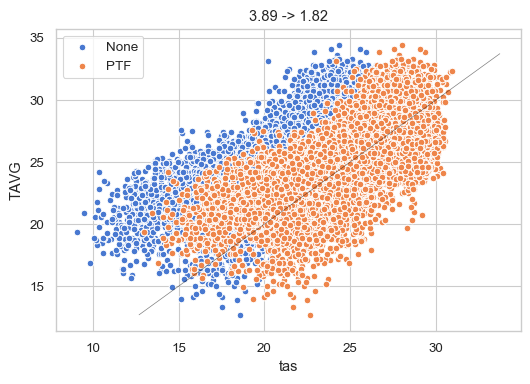

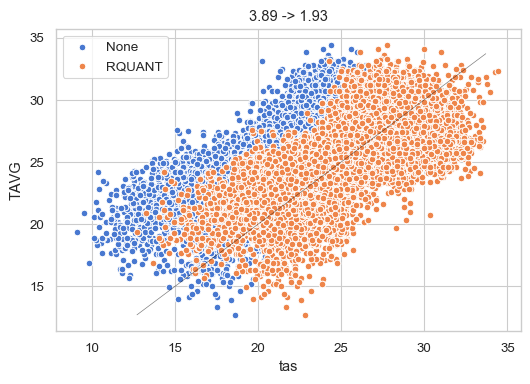

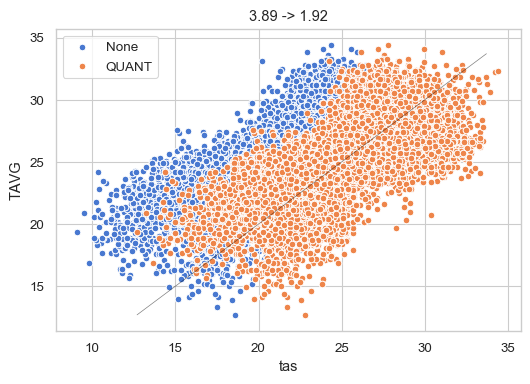

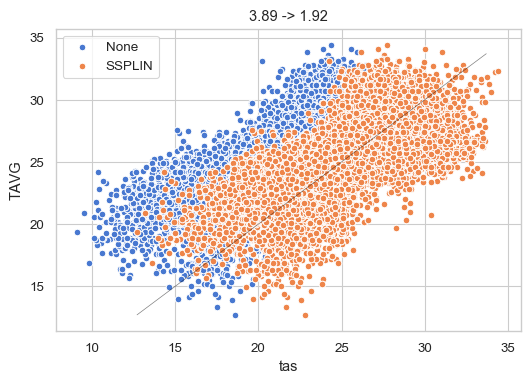

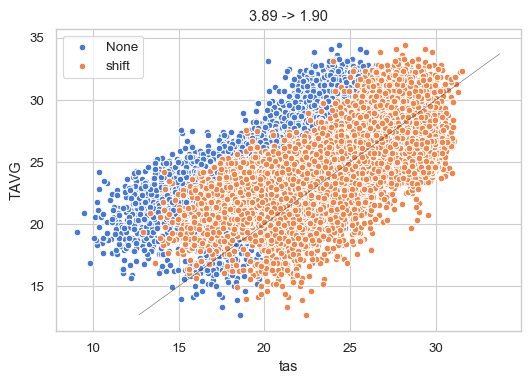

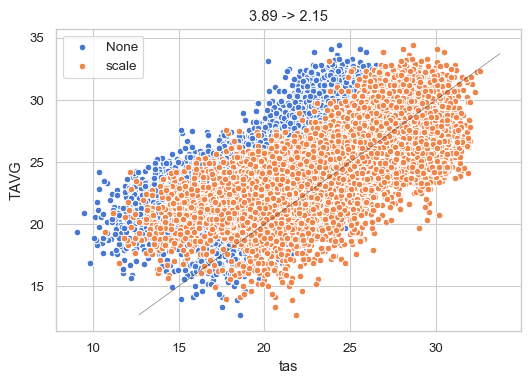

In [10]:
for method in methods:
    fig = plt.figure(dpi=100)
    sns.scatterplot(df[mod_index], df[obs_index], label='None')
    sns.scatterplot(df[method], df[obs_index], label=method)
    a = np.arange(np.min(df[obs_index]), np.max(df[obs_index]))
    sns.lineplot(a, a, color="k", alpha=0.5, linewidth=0.5)
    plt.title(f"{mae(df[mod_index], df[obs_index]):.2f} -> {mae(df[method], df[obs_index]):.2f}")
    plt.xlabel(mod_index)
    plt.ylabel(obs_index)

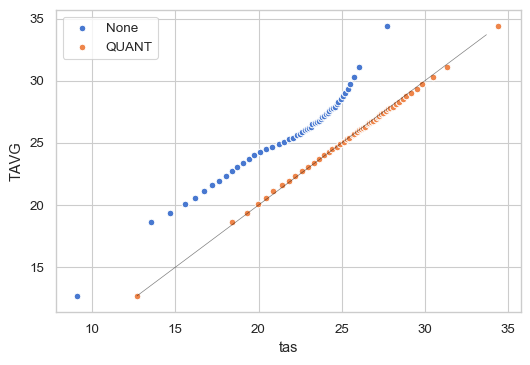

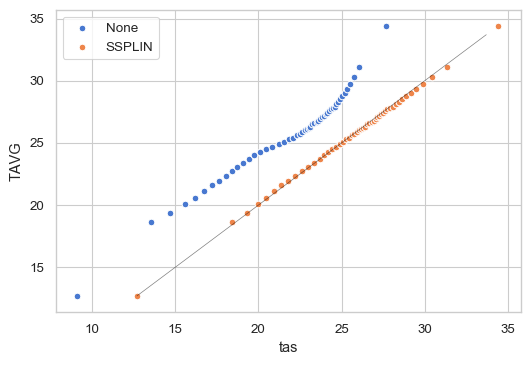

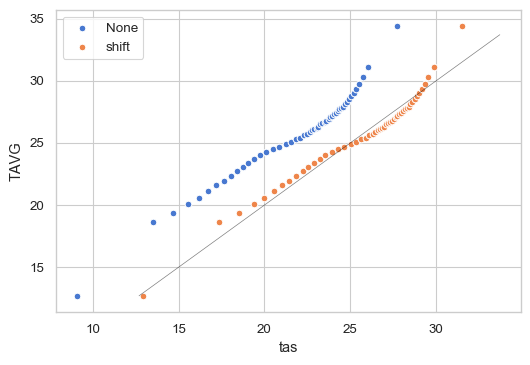

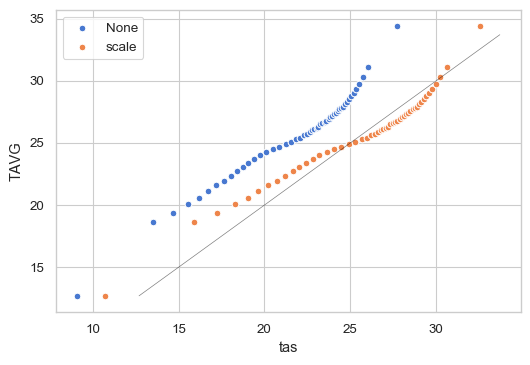

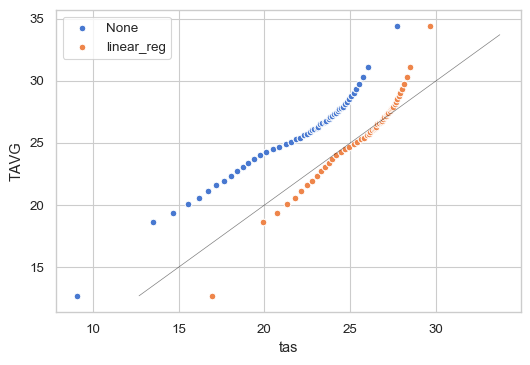

In [11]:
for method in methods:
    fig = plt.figure(dpi=100)
    qqplot(df[mod_index], df[obs_index], label="None")
    qqplot(df[method], df[obs_index], label=method)
    a = np.arange(np.min(df[obs_index]), np.max(df[obs_index]))
    sns.lineplot(a, a, color="k", alpha=0.5, linewidth=0.5)
    plt.xlabel(mod_index)
    plt.ylabel(obs_index)

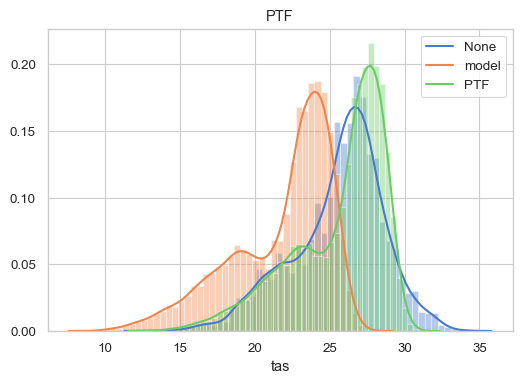

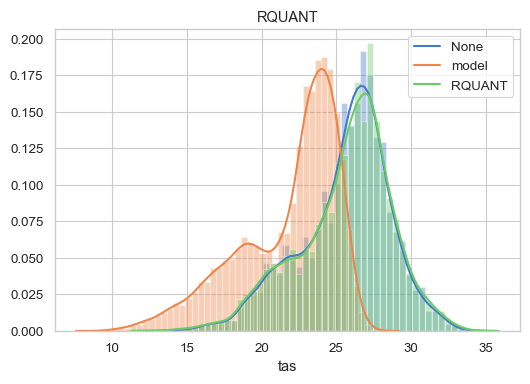

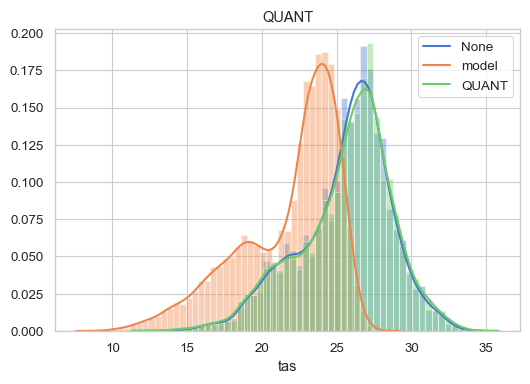

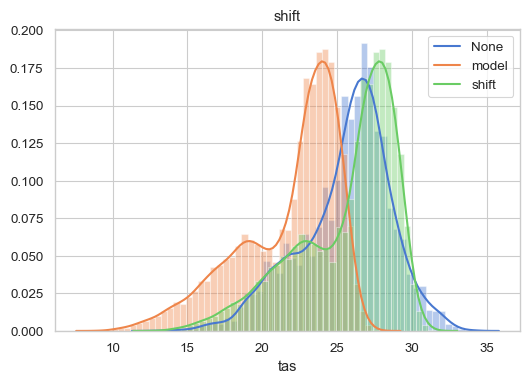

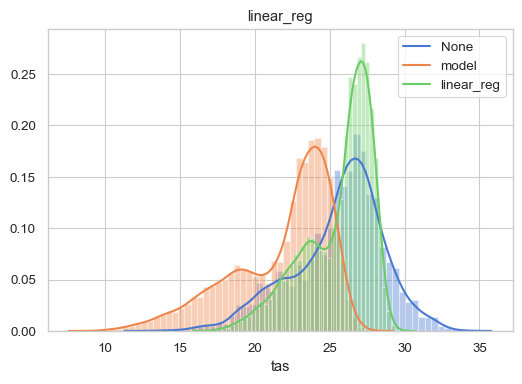

In [12]:
for method in methods:
    fig = plt.figure(dpi=100)
    plt.title(method)
    sns.distplot(df[obs_index], kde_kws={"label":'None'})
    sns.distplot(df[mod_index], kde_kws={"label":'model'})
    sns.distplot(df[method], kde_kws={"label": method})
    plt.xlabel(mod_index)

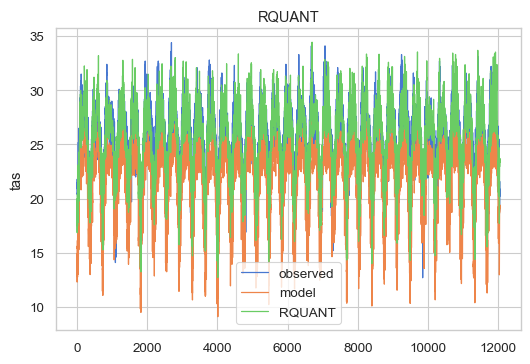

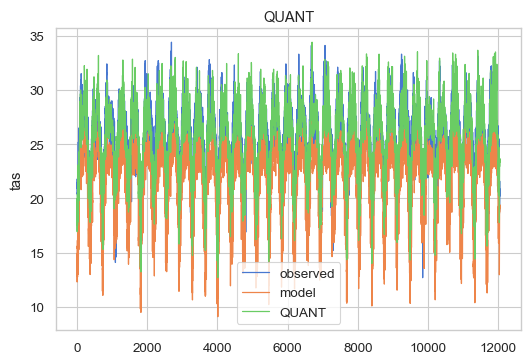

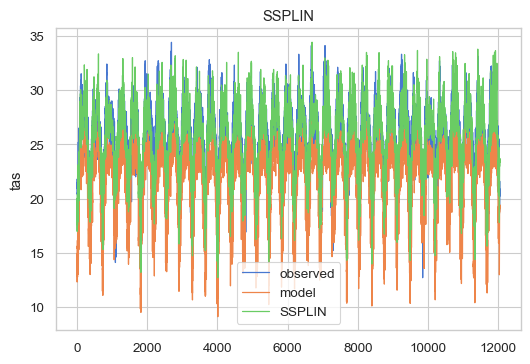

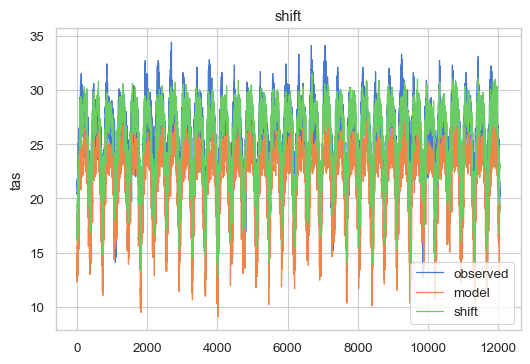

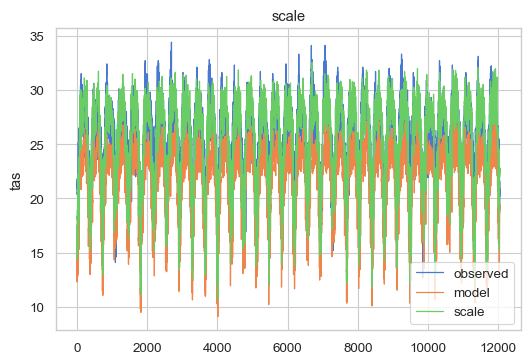

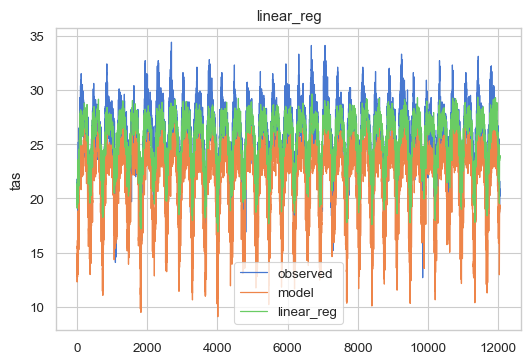

In [13]:
for method in methods:
    fig = plt.figure(dpi=100)
    plt.title(method)
    a = np.arange(len(df[obs_index]))
    sns.lineplot(a, df[obs_index], linewidth=0.9, label='observed')
    sns.lineplot(a, df[mod_index], linewidth=0.9, label='model')
    sns.lineplot(a, df[method], linewidth=0.9, label=method)
    plt.ylabel(mod_index)